# Assignment 1: Linear Regression
1. Download California Housing dataset.
2. Split the dataset into training and testing sets.
3. Train a linear regression model on the training set.
4. Evaluate the model on the test set using Mean Squared Error (MSE) as a metric.
5. Predict the price of a new house given its features

In [9]:
# 1. Download California Housing dataset.
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
print(data.DESCR)
X = data.data
y = data.target

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [2]:
# 2. Split the dataset into training and testing sets.
# Using stratified sampling to split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=np.floor(y / 1.5))

print("The length of training dataset: ", len(X_train))
print("The length of testing dataset: ", len(X_test))

The length of training dataset:  16512
The length of testing dataset:  4128


In [3]:
# 3. Train a linear regression model on the training set.
# 4. Evaluate the model on the test set using Mean Squared Error (MSE) as a metric.
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

# 均方誤差
mse = mean_squared_error(y_test, y_pred)
print("Mean-square error: ", mse)

Mean-square error:  0.5341796999543016


In [4]:
# 5. Predict the price of a new house given its features
# ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
new_house_features = np.array([[0.3, 28, 5, 2, 1000, 2.5, 34.0, -110.0]])
pred_price = linear_model.predict(new_house_features)
print("Predicted Price: ", pred_price)

Predicted Price:  [-2.26178096]


# Assignment 2: Linear Discriminant Analysis (LDA)
1. Download handwritten digit dataset.
2. Split the data into training and testing sets.
3. Apply LDA for feature extraction.
4. Train a classifier on the transformed training data.
5. Test the classifier on the transformed test data.

In [15]:
# 1. Download handwritten digit dataset.
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_digits()
print(data.DESCR)
X = data.data
y = data.target

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [16]:
# 2. Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 3. Apply LDA for feature extraction.
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [18]:
# 4. Train a classifier on the transformed training data.
svm_classifier = SVC()
svm_classifier.fit(X_train_lda, y_train)

SVC()

In [19]:
# 5. Test the classifier on the transformed test data.
y_pred = svm_classifier.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


# Assignment 3:  Decision Tree
1. Load the Iris dataset from sklearn.datasets.
2. Split the data into training and testing sets.
3. Train a decision tree classifier on the training data.
4. Test the classifier on the test data.
5. Visualize the decision tree.

In [20]:
# 1. Load the Iris dataset from sklearn.datasets.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data = load_iris()
print(data.DESCR)
X = data.data
y = data.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [21]:
# 2. Split the data into training and testing sets.
# Using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# 3. Train a decision tree classifier on the training data.
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
# 4. Test the classifier on the test data.
y_pred = decision_tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9333333333333333


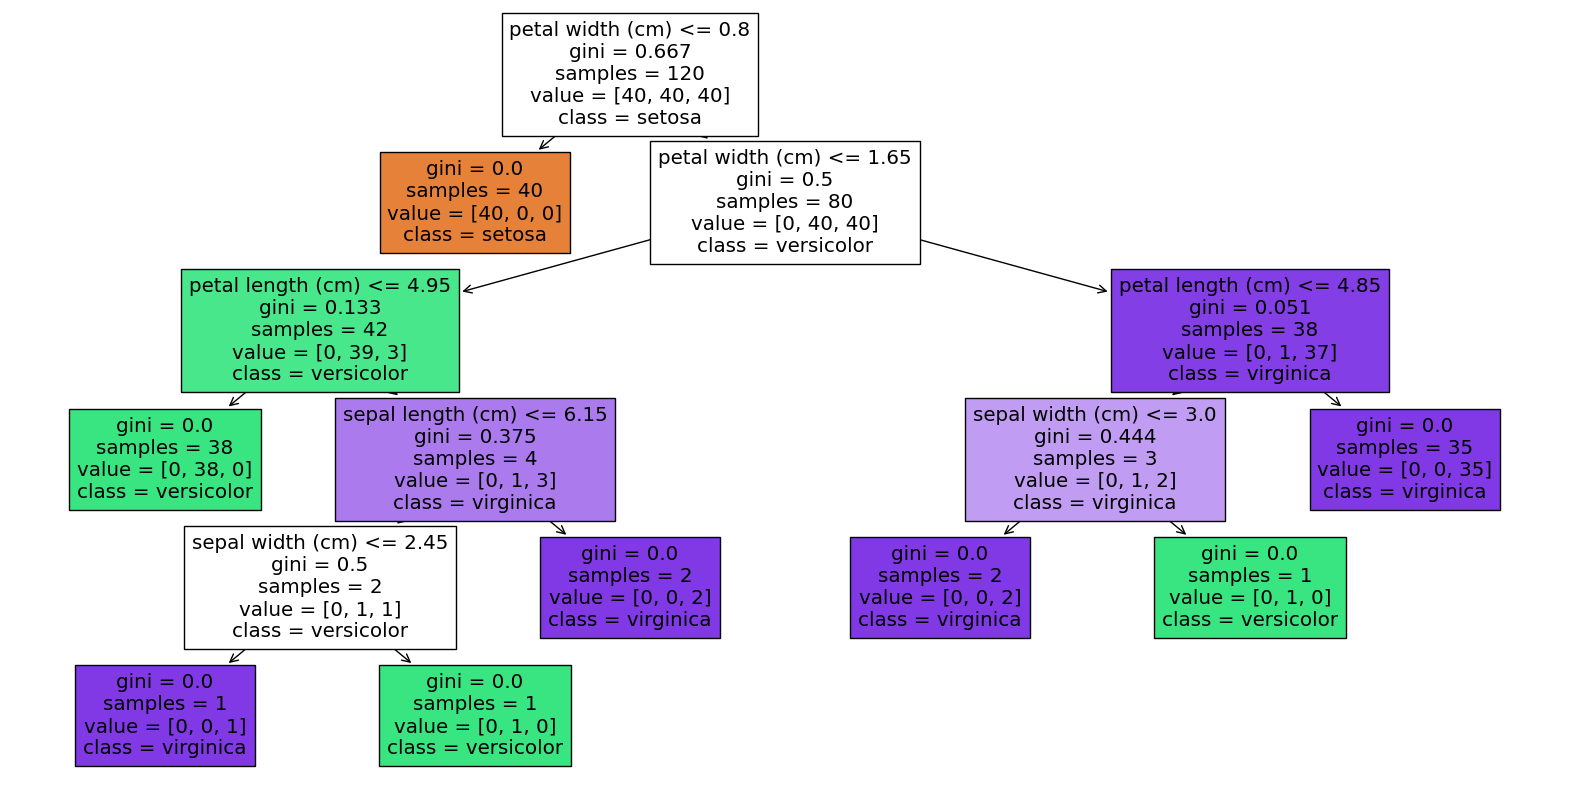

In [25]:
# 5. Visualize the decision tree.
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, feature_names=data.feature_names, class_names=data.target_names.tolist(), filled=True)
plt.show()

# Assignment 4: Support Vector Machine (SVM)
1. Load the digits dataset from sklearn.datasets.
2. Split the data into training and testing sets.
3. Train an SVM classifier on the training data.
4. Test the classifier on the test data.

In [26]:
# 1. Load the digits dataset from sklearn.datasets.
data = load_digits()
X = data.data
y = data.target

In [27]:
# 2. Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 3. Train an SVM classifier on the training data.
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [29]:
# 4. Test the classifier on the test data.
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9861111111111112


# Assignment 5: K-Nearest Neighbors (KNN)
1. Load the Iris dataset from sklearn.datasets.
2. Split the data into training and testing sets.
3. Train a KNN classifier on the training data.
4. Test the classifier on the test data.

In [30]:
# 1. Load the Iris dataset from sklearn.datasets.
data = load_iris()
X = data.data
y = data.target

In [31]:
# 2. Split the data into training and testing sets.
# Using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# 3. Train a KNN classifier on the training data.
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# 4. Test the classifier on the test data.
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


# Assignment 6: Principal Component Analysis (PCA)
1. Load the digits dataset from sklearn.datasets.
2. Apply PCA to reduce the dimensionality of the images.
3. Visualize the reduced data in a 2D scatter plot.

In [34]:
# 1. Load the digits dataset
from sklearn.decomposition import PCA
data = load_digits()
X = data.data
y = data.target

In [35]:
# 2. Apply PCA to reduce dimensionality
# Reduce to 2 principal components
pca = PCA(n_components=2)  
X_reduced = pca.fit_transform(X)

C:\Users\user\AppData\Local\Temp\ipykernel_13628\19258541.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('jet', 10))


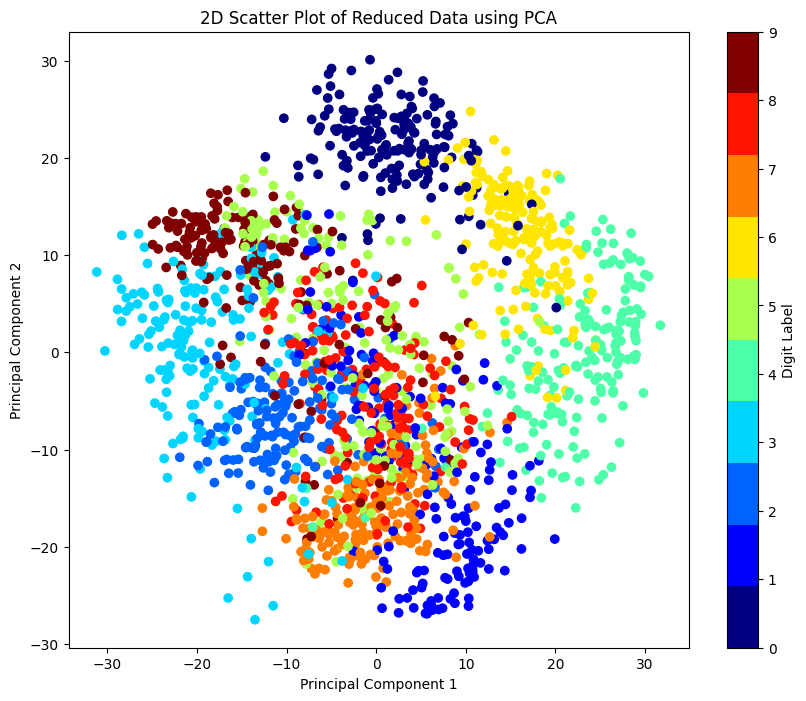

In [36]:
# 3. Visualize reduced data in a 2D scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(label='Digit Label', ticks=range(10))
plt.title('2D Scatter Plot of Reduced Data using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Assignment 7: Common Spatial Patterns (CSP)
1. Load the MNE EEG dataas template
2. Apply band-pass filter
3. Apply the CSP algorithm for feature extraction.
4. Classification with linear discrimant analysis

https://mne.tools/stable/auto_examples/decoding/decoding_csp_eeg.html

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
subject = 1
runs = [6, 10, 14]  # motor imagery: hands vs feet

raw_fnames = eegbci.load_data(subject, runs)

Using default location ~/mne_data for EEGBCI...
Creating ~/mne_data


Attempting to create new mne-python configuration file:
C:\Users\user\.mne\mne-python.json
Download complete in 51s (7.4 MB)
